In [16]:
# 百公里亏电油耗 单位升
oil_consumption_100km=5.9
# 纯电续航 千米    
pure_electric_milage=160
# 电池容量 单位 千瓦时
battery_capacity=26.6
# 92油价格 元/升
oil_fee92=7.56
# 充电桩损耗 
charge_loss=0.12
# 1度电价 
electric_price=1.12


In [17]:
# 计算 1度电能跑多少
one_kwh_milage=  pure_electric_milage/battery_capacity

# 保留两位小数
print("1度电能跑",round(one_kwh_milage,2),"公里")

# 传入1度电价
def calc_electric_fee(electric_price):
    return electric_price*battery_capacity/(1-charge_loss)/pure_electric_milage

# 每公里电费
one_km_electric_fee= calc_electric_fee(electric_price)
print("每公里电费",round(one_km_electric_fee,2),"元")
# 百公里电费
bai_electric_fee=  100*one_km_electric_fee
print("百公里电费",round(bai_electric_fee,2),"元")

# 百公里油费
bai_oil_fee=  oil_consumption_100km*oil_fee92
print("百公里油费",round(bai_oil_fee,2),"元")

1度电能跑 6.02 公里
每公里电费 0.21 元
百公里电费 21.16 元
百公里油费 44.6 元


([<matplotlib.axis.XTick at 0x1aa70c1f610>,
 [Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8000000000000002, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2'),
  Text(1.4000000000000004, 0, '1.4'),
  Text(1.6000000000000005, 0, '1.6'),
  Text(1.8000000000000003, 0, '1.8'),
  Text(2.0000000000000004, 0, '2.0'),
  Text(2.2000000000000006, 0, '2.2'),
  Text(2.400000000000001, 0, '2.4'),
  Text(2.6000000000000005, 0, '2.6')])

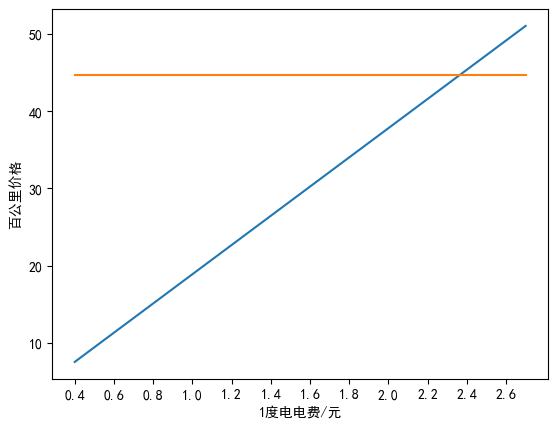

In [18]:
# 绘制x轴为电费，y轴为100公里价格的线图

import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

x = np.arange(0.4, 2.8, 0.1)
y= [100*calc_electric_fee(i) for i in x]
# 绘制线图
plt.plot(x,y)
plt.xlabel('1度电电费/元')
plt.ylabel('百公里价格')

# 绘制第二条线
# 绘制百公里油耗线
plt.plot(x,[bai_oil_fee]*len(x))
plt.xticks(np.arange(0.4, 2.8, 0.2))

